# 5003 HW4

## ZHANG Juntao - 20908272

Some required packages

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

#### Get the value of $a$

$f(x)=a e^{-U(x) / k_{\mathrm{B}} T}$, where $U(x)=\frac{1}{2} k x^2$ and $k_B T / k=1$ $\Rightarrow f(x)=a e^{-\frac{1}{2} x^2}$


From $\int_{-\infty}^{\infty} f(x) d x=1$, we can get: $\frac{1}{a}=\int_{-\infty}^{\infty} e^{-\frac{1}{2} x^2} d x$

Let $I=\int_{-\infty}^{\infty} e^{-\frac{1}{2} x^2} d x$

$$
\begin{aligned}
I^2 &=\int_{-\infty}^{\infty} e^{-\frac{1}{2} \pi^2} d x \int_{-\infty}^{\infty} e^{-\frac{1}{2} y^2} d y \\
&=\int_{-\infty}^{\infty} d x \int_{-\infty}^{\infty} d y  e^{-\frac{1}{2}\left(x^2+y^2\right)} \\
&=\int_0^{2 \pi} d \theta \int_0^{\infty}  r e^{-\frac{1}{2} r^2} d r \\
&=2 \pi
\end{aligned}
$$
Thus, $I=\sqrt{2 \pi} $ $\Rightarrow a=\frac{1}{\sqrt{2 \pi}}$

i.e. $f(x)=\frac{1}{\sqrt{2 \pi}} e^{-\frac{1}{2} x^2}$, which is the PDF of $N(0,1)$

### $Problem (a)$:

#### Use the Metropolis algorithm to generate a Markov chain according to $f(x)$

Define function to generate configurations with a probability $exp(- E / k_B T)$:

- generate_state

In [2]:
def generate_state():
    while True:
        x = np.random.normal(0, 1)
        prob = np.exp(-1/2 * x**2)
        u = np.random.uniform(0,1)
        if u <= prob:
            return x

Define function to generate a Markov chain through $"Metropolis Importance  Sampling  Algo"$:

- generate_seq

In [3]:
def generate_seq(total):
    seq = []
    x1 = generate_state()
    seq.append(x1)
    count = 0
    while count <= total:
        x_new = generate_state()
        if x_new**2 < seq[-1]**2:
            seq.append(x_new)
        else:
            p = np.exp(-1/2 * (x_new**2-seq[-1]**2))
            r = np.random.uniform(0,1)
            if r <= p:
                seq.append(x_new)
            else:
                seq.append(seq[-1])
        count += 1
    return seq

Generate a Markov chain(length is 1000002)and evaluate the expectation values of $X, X^{2}, X^{3}$ and $X^{4}$

In [4]:
np.random.seed(77)

length = 1000000
s = generate_seq(length)  
print('The expectation value of x is:', np.mean(s))

s_2 = list(map(lambda x: x**2, s))
print("The expectation value of x^2 is:", np.mean(s_2))

s_3 = list(map(lambda x: x**3, s))
print("The expectation value of x^3 is:", np.mean(s_3))

s_4 = list(map(lambda x: x**4, s))
print("The expectation value of x^4 is:", np.mean(s_4))

The expectation value of x is: 3.065696590831337e-05
The expectation value of x^2 is: 0.33306846636344944
The expectation value of x^3 is: -3.640361843767445e-05
The expectation value of x^4 is: 0.3325923902304039


#### Conclusion:

The expectation value of $ X$ is: 3.065696590831337e-05

The expectation value of $X^{2}$ is: 0.33306846636344944

The expectation value of $X^{3}$ is: -3.640361843767445e-05

The expectation value of $X^{4}$ is: 0.3325923902304039

### $Problem (b)$:

#### Plot the histogram of the x values in the sequence and compare it with $f(x)$

/Users/klaus_zhangjt/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


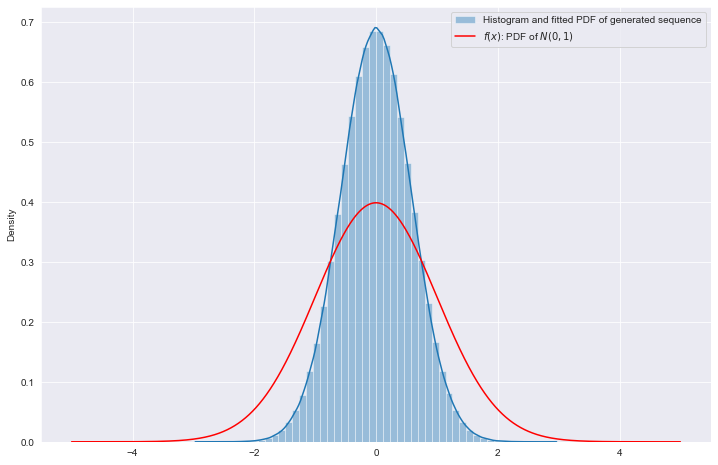

In [5]:
plt.figure(figsize = (12,8))

sns.set_style('darkgrid')
sns.distplot(s, label='Histogram and fitted PDF of generated sequence')

Z_step = np.arange(-5, 5, 0.001)
Z_theoretical = norm.pdf(Z_step, loc=0, scale=1)
plt.plot(Z_step,Z_theoretical, color='r', label='$f(x)$: PDF of $N(0, 1)$')

plt.legend()
plt.show()

#### Conclusion:

- The PDF of generated sequence is symmetrical about the y-axis, which is same with $f(x)$, i.e. they have same zero mean.

- But it has a lanky shape compared with $f(x)$, which shows that it has a smaller variance.

- The samples of the generated sequence are concentrated where the value of $f(x)$ is large,
i.e. in original samples, more points are selected where the density is high, and few points are selected where the density  is low. It perfectly agrees with the aim of Metropolis Importance Sampling Algorithm.